In [88]:
# Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 
#This task is about Exploratory Data Analysis - Retail where the task focuses on a 
#business manager who will try to find out weak
#areas where he can work to make more profit

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
#Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program, where that condition (normally) doesn’t warrant raising an exception and terminating the program.
#For example, one might want to issue a warning when a program uses an obsolete module.
#The determination whether to issue a warning message is controlled by the warning filter,
#which is a sequence of matching rules and actions. Rules can be added to the filter
#by calling filterwarnings() and reset to its default state by calling resetwarnings().
import warnings 
warnings.filterwarnings('ignore')

In [3]:
help(warnings)

Help on module warnings:

NAME
    warnings - Python part of the warnings subsystem.

MODULE REFERENCE
    https://docs.python.org/3.8/library/warnings
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

CLASSES
    builtins.object
        catch_warnings
    
    class catch_warnings(builtins.object)
     |  catch_warnings(*, record=False, module=None)
     |  
     |  A context manager that copies and restores the warnings filter upon
     |  exiting the context.
     |  
     |  The 'record' argument specifies whether warnings should be captured by a
     |  custom implementation of warnings.showwarning() and be appended to a list
     |  returned by the context manager. Otherwise None is returned by the context
  

In [4]:
df = pd.read_csv('Sample - Superstore')  #loading dataset
#pd.set_option("display.max_rows",None,"display.max_columns",None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,08-11-2018,11-11-2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,08-11-2018,11-11-2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,12-06-2018,16-06-2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,11-10-2017,18-10-2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,11-10-2017,18-10-2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.tail()     #bottom 5 rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2016-110422,21-01-2016,23-01-2016,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2019-121258,26-02-2019,03-03-2019,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2019-121258,26-02-2019,03-03-2019,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2019-121258,26-02-2019,03-03-2019,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2019-119914,04-05-2019,09-05-2019,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [6]:
df.shape #No. of rows and columns

(9994, 21)

In [7]:
df.describe()       #display summary

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isnull().sum()    #checking null values
#only is null gives bollean expression (True/False), True for null
#using sum gives the total no. of null values in an object

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [9]:
df.info()           #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
df.duplicated().sum()
#only giving duplicated will show true/false against each index value

0

In [12]:
df.nunique() #no. of Elements in the dataset

Row ID            9994
Order ID          5009
Order Date        1236
Ship Date         1334
Ship Mode            4
Customer ID        793
Customer Name      793
Segment              3
Country/Region       1
City               531
State               49
Postal Code        630
Region               4
Product ID        1862
Category             3
Sub-Category        17
Product Name      1850
Sales             5825
Quantity            14
Discount            12
Profit            7287
dtype: int64

In [13]:
#REMOVE This Code
df['Postal Code'] = df['Postal Code'].astype('object')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   object 
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [14]:
#subset: column label or sequence of labels to consider for identifying duplicate rows.
#By default, all the columns are used to find the duplicate rows.
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

<AxesSubplot:>

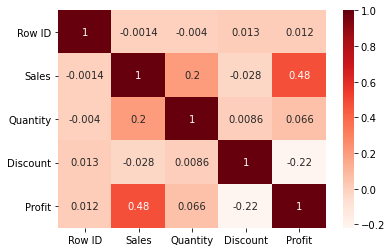

In [15]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Reds')
#Cyclic cmap() in Python represents a change in the lightness of two different colors that meet
#in the middle and beginning/end at an unsaturated color. 

#To add text over the heatmap, we can use the annot attribute. If annot is set to True,
#the text will be written on each cell.
#If the labels for each cell is defined, you can assign the labels to the annot attribute.

In [16]:
df = df.drop(['Postal Code'],axis = 1)    #dropping postal code columns #axis= 0-by row

In [17]:
df['Ship Mode'].value_counts() #counts the no. of values under each type

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

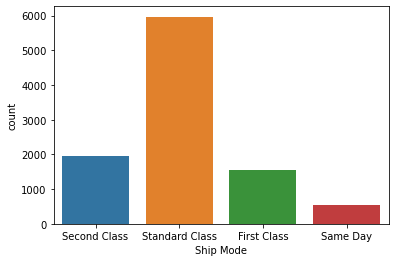

In [18]:
sns.countplot(x=df['Ship Mode']) #plot of count of different types of ship mode

In [19]:
df['Segment'].value_counts()        #valuecounts for segment

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

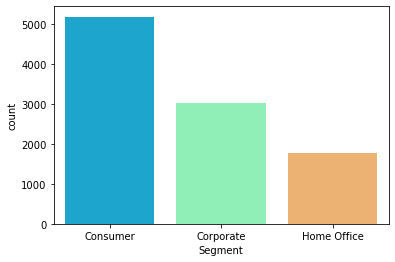

In [20]:
sns.countplot(x = 'Segment',data = df, palette = 'rainbow')
#other example-colorblind

In [21]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

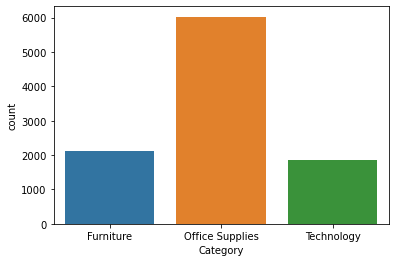

In [22]:
sns.countplot(x='Category',data=df,palette='tab10')

In [23]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

<AxesSubplot:ylabel='Sub-Category'>

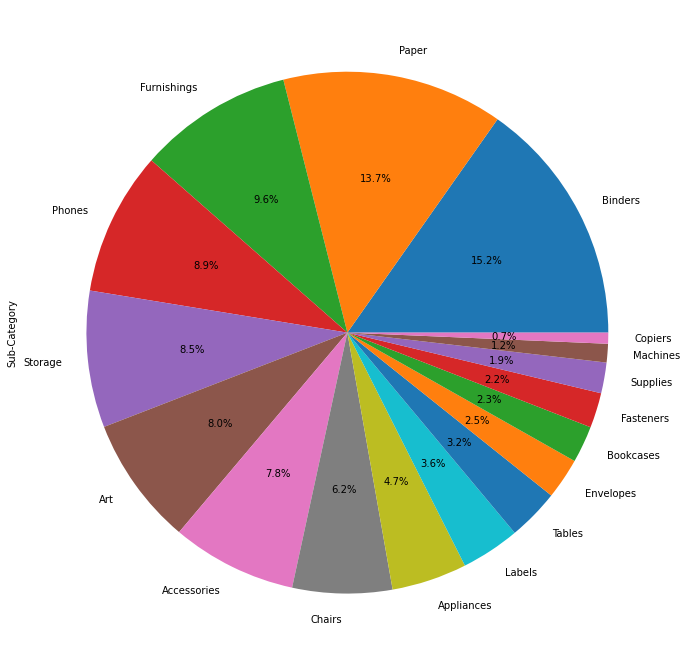

In [68]:
#CHANGE, show percent autopct = %2f
#Matplotlib allows the aspect ratio, DPI and figure size to be specified
#when the Figure object is created, using the figsize and dpi keyword arguments. figsize is a tuple of
#the width and height of the figure in inches, and dpi is the dots-per-inch (pixel per inch)
plt.figure(figsize=(15,12)) 
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')

# Observation 1
Maximum orders are from Binders, Paper, furnishings, Phones, storage, art, accessories and minimum from copiers, machines, suppliers

In [25]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

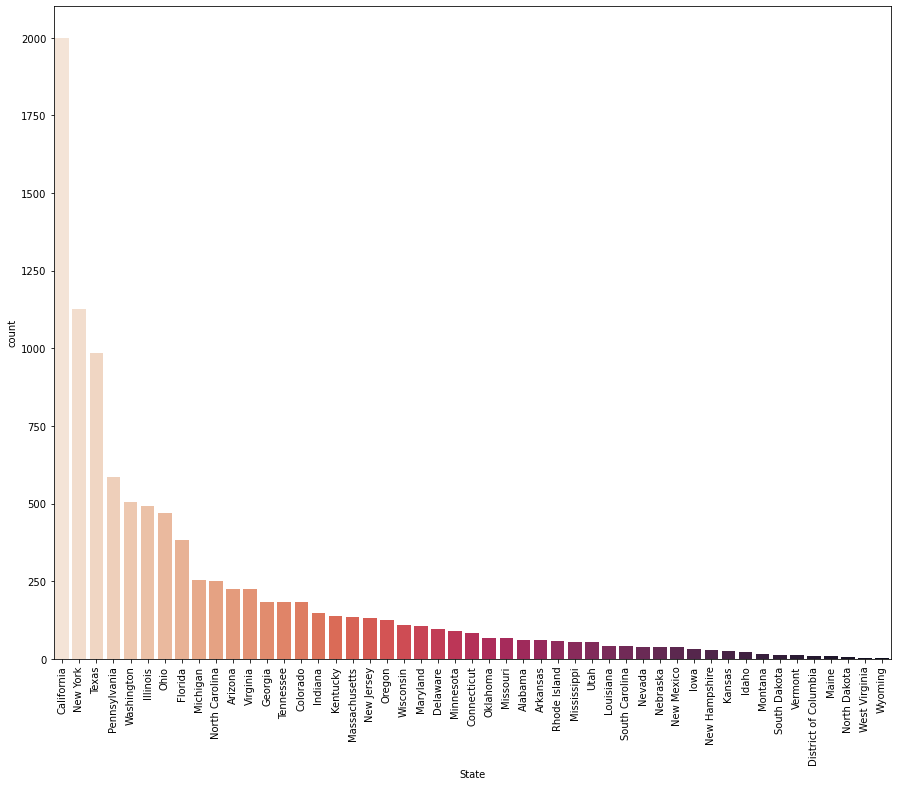

In [58]:
#Matplotlib allows the aspect ratio, DPI and figure size to be specified
#when the Figure object is created, using the figsize and dpi keyword arguments. figsize is a tuple of
#the width and height of the figure in inches, and dpi is the dots-per-inch (pixel per inch)
#rotate X axis labels by 90 degrees
#order for descending by index

plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,palette='rocket_r',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Observation 2
Highest number of buyers are from California and New York

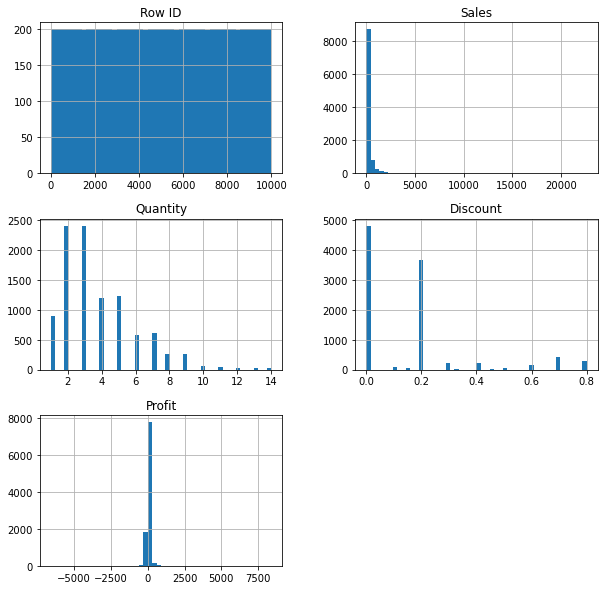

In [67]:
df.hist(figsize=(10,10),bins=50)
plt.show()

# Observation 3
Most customers tends to buy quantity of 2 and 3
Discount give maximum is 0 to 20 percent

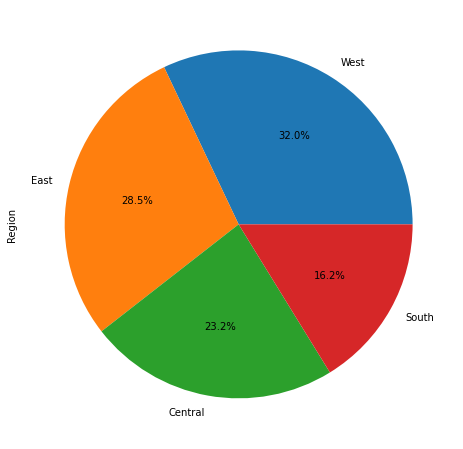

In [70]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

# Observation 4- Highest no. of orders were placed in Western Region.

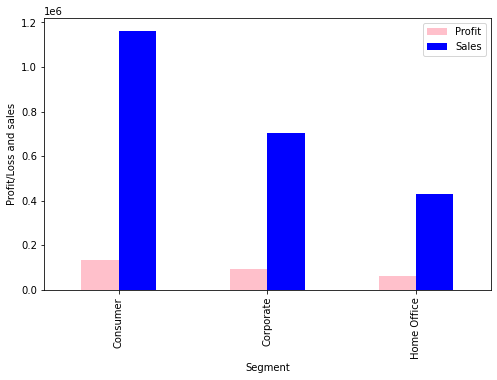

In [73]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

# Observation 5
Profit and sales are maximum in consumer segment and minimum in Home Office segment

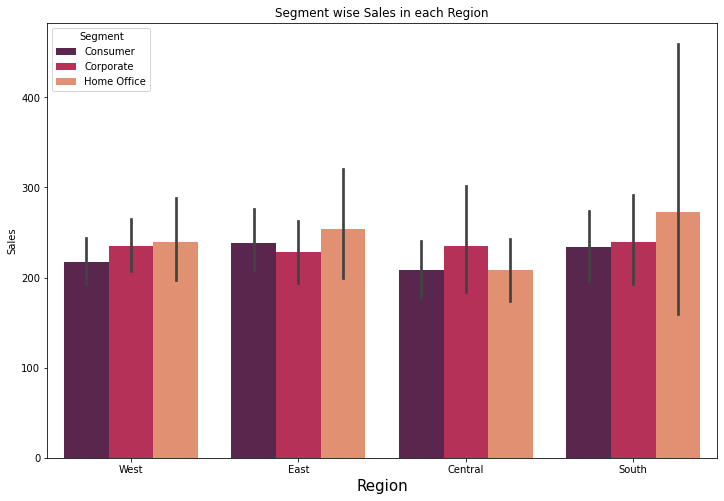

In [78]:
#hue : (optional) This parameter take column name for colour encoding. data : (optional)
#This parameter take DataFrame, array, or list of arrays, Dataset for plotting.
#If x and y are absent, this is interpreted as wide-form
#hue- distribution on the basis of segment
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

# Observation 6
Segment wise sales are almost same in every region

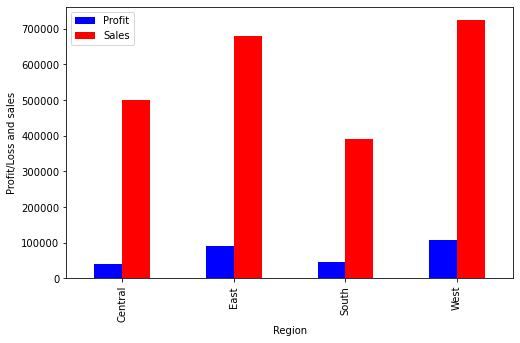

In [31]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()


# Observation 7 Highest sales and profit are in western region

In [32]:
t_states = df['State'].value_counts().nlargest(10)
t_states

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

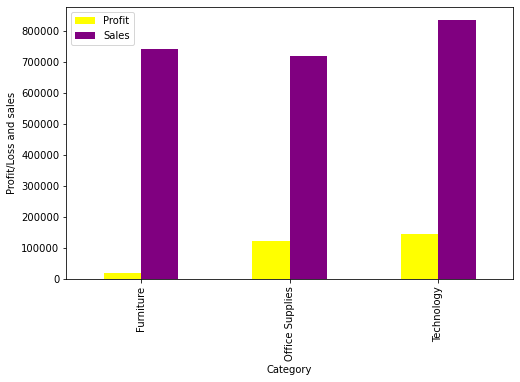

In [85]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

# Observation 8
## As a business manager, try to find out the weak areas where you can work to make more profit?
Technology and Office Supplies have high profit.
Furniture have less profit

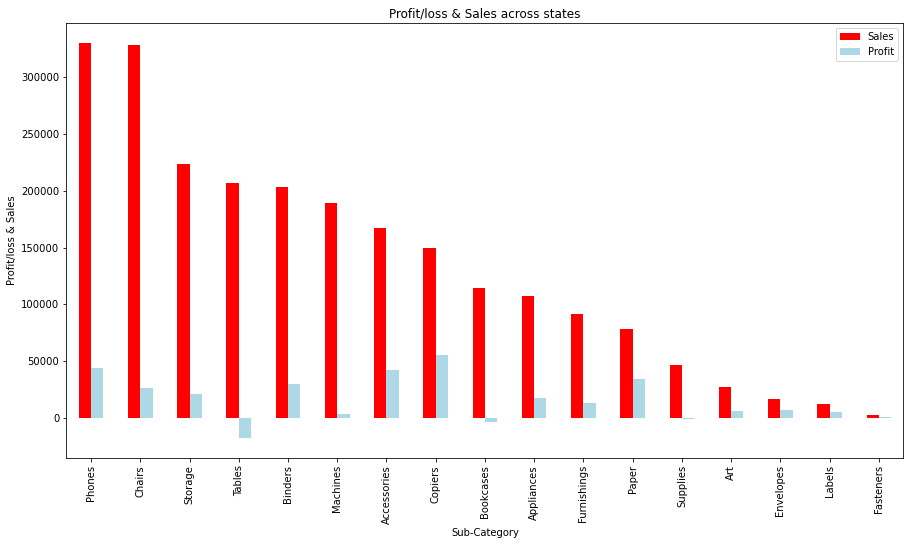

In [87]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

# Observation 9 - Highest Sales are in sub-category phones but highest profit is coming from copiers,

# Tables and Bookcases are in losses